In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/immunotherapy/Immunotherapy.xlsx


In [2]:
# Load the dataset
data_path = '/kaggle/input/immunotherapy/Immunotherapy.xlsx'
data = pd.read_excel(data_path)

# Display the first few rows
print("Dataset Preview:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Dataset Preview:
   sex  age   Time  Number_of_Warts  Type  Area  induration_diameter  \
0    1   22   2.25               14     3    51                   50   
1    1   15   3.00                2     3   900                   70   
2    1   16  10.50                2     1   100                   25   
3    1   27   4.50                9     3    80                   30   
4    1   20   8.00                6     1    45                    8   

   Result_of_Treatment  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  

Missing Values:
sex                    0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
induration_diameter    0
Result_of_Treatment    0
dtype: int64


In [3]:
# Feature and target selection
# Independent variables (features)
X = data[['sex', 'age', 'Time', 'Number_of_Warts', 'Type', 'Area', 'induration_diameter']]
# Dependent variable (target)
y = data['Result_of_Treatment']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Size:", X_train.shape)
print("Test Data Size:", X_test.shape)


Training Data Size: (72, 7)
Test Data Size: (18, 7)


In [4]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Feature Normalization Complete")


Feature Normalization Complete


In [5]:
# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can experiment with different values of n_neighbors
knn.fit(X_train, y_train)

print("KNN Model Training Complete")


KNN Model Training Complete



Evaluation Metrics:
Accuracy: 0.7777777777777778

Confusion Matrix:
[[ 1  4]
 [ 0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.76      1.00      0.87        13

    accuracy                           0.78        18
   macro avg       0.88      0.60      0.60        18
weighted avg       0.83      0.78      0.72        18



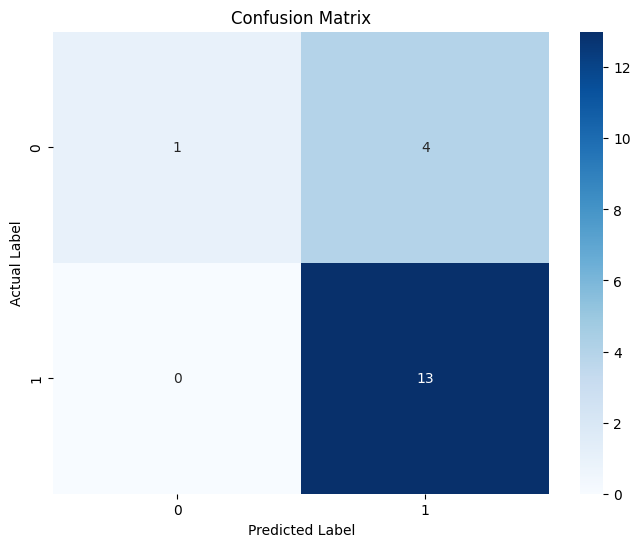

In [6]:
# Make predictions on test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()


In [7]:
# Sample predictions
predictions = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print("\nSample Predictions:")
print(predictions.head())



Sample Predictions:
   Actual  Predicted
0       1          1
1       0          1
2       1          1
3       1          1
4       1          1
